**라이브러리 실행 및 데이터 불러오기**

In [ ]:
# 라이브러리 실행
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/data/breast_cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


**필수 1. 기초 통계**

---



- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 **진단 결과(diagnosis)**에 따라 분석해보세요.
    
    각 카테고리에 속한 특성들의 **평균과 중앙값**을 구하고 해석해주세요.
    
    1. **크기/형태 관련 특성의 기초통계**
        - radius_mean, perimeter_mean, area_mean에 대한 진단별 평균과 중앙값을 구하세요.
    2. **표면 특성의 기초통계**
        - texture_mean, smoothness_mean에 대한 진단별 평균과 중앙값을 구하세요.
    3. **형태 복잡도 특성의 기초통계**
        - compactness_mean, concavity_mean, concave points_mean에 대한 진단별 평균과 중앙값을 구하세요.
    4. **구조적 특성의 기초통계**
        - symmetry_mean, fractal_dimension_mean에 대한 진단별 평균과 중앙값을 구하세요.
- **유의 사항**
    - 결과는 **소수점 둘째자리**까지 표현해주세요.
    - 각 카테고리별로 **간단한 해석**을 덧붙여주세요.



In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:

# 'diagnosis' 컬럼을 기준으로 데이터 그룹화
grouped_data = df.groupby('diagnosis')

# 특성 카테고리별로 분석할 컬럼 정의
# 크기/형태 관련 특성
size_shape_features = ['radius_mean', 'perimeter_mean', 'area_mean']

# 표면 특성
surface_features = ['texture_mean', 'smoothness_mean']

# 형태 복잡도 특성
complexity_features = ['compactness_mean', 'concavity_mean', 'concave points_mean']

# 구조적 특성
structural_features = ['symmetry_mean', 'fractal_dimension_mean']

# 통계를 계산하는 함수 정의
def calculate_statistics(features):
    # 그룹별로 평균(mean)과 중앙값(median)을 계산
    stats = grouped_data[features].agg(['mean', 'median'])
    # 소수점 둘째자리까지 반올림
    stats = stats.round(2)
    return stats

# 각 카테고리별 통계 계산
size_shape_stats = calculate_statistics(size_shape_features)  # 크기/형태 관련 특성 통계
surface_stats = calculate_statistics(surface_features)        # 표면 특성 통계
complexity_stats = calculate_statistics(complexity_features) # 형태 복잡도 특성 통계
structural_stats = calculate_statistics(structural_features) # 구조적 특성 통계

# 템플릿 형식으로 출력
print("- **크기/형태 관련 특성 통계량:**")
print(f"    - 양성(B) 종양 :")
for feature in size_shape_features:
    print(f"        - {feature}: 평균 `{size_shape_stats.loc['B', (feature, 'mean')]}` , 중앙값 `{size_shape_stats.loc['B', (feature, 'median')]}`")
print(f"    - 악성(M) 종양 :")
for feature in size_shape_features:
    print(f"        - {feature}: 평균 `{size_shape_stats.loc['M', (feature, 'mean')]}` , 중앙값 `{size_shape_stats.loc['M', (feature, 'median')]}`")

print("\n- **표면 특성 통계량:**")
print(f"    - 양성(B) 종양 :")
for feature in surface_features:
    print(f"        - {feature}: 평균 `{surface_stats.loc['B', (feature, 'mean')]}` , 중앙값 `{surface_stats.loc['B', (feature, 'median')]}`")
print(f"    - 악성(M) 종양 :")
for feature in surface_features:
    print(f"        - {feature}: 평균 `{surface_stats.loc['M', (feature, 'mean')]}` , 중앙값 `{surface_stats.loc['M', (feature, 'median')]}`")

print("\n- **형태 복잡도 특성 통계량:**")
print(f"    - 양성(B) 종양 :")
for feature in complexity_features:
    print(f"        - {feature}: 평균 `{complexity_stats.loc['B', (feature, 'mean')]}` , 중앙값 `{complexity_stats.loc['B', (feature, 'median')]}`")
print(f"    - 악성(M) 종양 :")
for feature in complexity_features:
    print(f"        - {feature}: 평균 `{complexity_stats.loc['M', (feature, 'mean')]}` , 중앙값 `{complexity_stats.loc['M', (feature, 'median')]}`")

print("\n- **구조적 특성 통계량:**")
print(f"    - 양성(B) 종양 :")
for feature in structural_features:
    print(f"        - {feature}: 평균 `{structural_stats.loc['B', (feature, 'mean')]}` , 중앙값 `{structural_stats.loc['B', (feature, 'median')]}`")
print(f"    - 악성(M) 종양 :")
for feature in structural_features:
    print(f"        - {feature}: 평균 `{structural_stats.loc['M', (feature, 'mean')]}` , 중앙값 `{structural_stats.loc['M', (feature, 'median')]}`")





- **크기/형태 관련 특성 통계량:**
    - 양성(B) 종양 :
        - radius_mean: 평균 `12.15` , 중앙값 `12.2`
        - perimeter_mean: 평균 `78.08` , 중앙값 `78.18`
        - area_mean: 평균 `462.79` , 중앙값 `458.4`
    - 악성(M) 종양 :
        - radius_mean: 평균 `17.46` , 중앙값 `17.33`
        - perimeter_mean: 평균 `115.37` , 중앙값 `114.2`
        - area_mean: 평균 `978.38` , 중앙값 `932.0`

- **표면 특성 통계량:**
    - 양성(B) 종양 :
        - texture_mean: 평균 `17.91` , 중앙값 `17.39`
        - smoothness_mean: 평균 `0.09` , 중앙값 `0.09`
    - 악성(M) 종양 :
        - texture_mean: 평균 `21.6` , 중앙값 `21.46`
        - smoothness_mean: 평균 `0.1` , 중앙값 `0.1`

- **형태 복잡도 특성 통계량:**
    - 양성(B) 종양 :
        - compactness_mean: 평균 `0.08` , 중앙값 `0.08`
        - concavity_mean: 평균 `0.05` , 중앙값 `0.04`
        - concave points_mean: 평균 `0.03` , 중앙값 `0.02`
    - 악성(M) 종양 :
        - compactness_mean: 평균 `0.15` , 중앙값 `0.13`
        - concavity_mean: 평균 `0.16` , 중앙값 `0.15`
        - concave points_mean: 평균 `0.09` , 중앙값 `0.09`

- **구조적 특성 통계량:**
    - 양성(B) 종양 :
    

**필수 1 답안 템플릿 (복제 해서 네 가지 특성에 대해 모두 답변을 작성하세요)**
1. ___ 관련 특성 통계량 :
    - 양성(B) 종양 :
        - [feature 이름]_mean: 평균 `___` , 중앙값 `___`
        - [feature 이름]_mean: 평균 `___`, 중앙값 `___`
        - [feature 이름]_mean: 평균 `___`, 중앙값 `___`
    - 악성(M) 종양 :
        - [feature 이름]_mean: 평균 `___` , 중앙값 `___`
        - [feature 이름]_mean: 평균 `___`, 중앙값 `___`
        - [feature 이름]_mean: 평균 `___`, 중앙값 `___`
    - 해석 :
        - `해석을 자유롭게 입력하세요`

**필수 1 답안**

- **크기/형태 관련 특성 통계량:**
    - 양성(B) 종양 :
        - radius_mean: 평균 `12.15` , 중앙값 `12.2`
        - perimeter_mean: 평균 `78.08` , 중앙값 `78.18`
        - area_mean: 평균 `462.79` , 중앙값 `458.4`
    - 악성(M) 종양 :
        - radius_mean: 평균 `17.46` , 중앙값 `17.33`
        - perimeter_mean: 평균 `115.37` , 중앙값 `114.2`
        - area_mean: 평균 `978.38` , 중앙값 `932.0`

- **표면 특성 통계량:**
    - 양성(B) 종양 :
        - texture_mean: 평균 `17.91` , 중앙값 `17.39`
        - smoothness_mean: 평균 `0.09` , 중앙값 `0.09`
    - 악성(M) 종양 :
        - texture_mean: 평균 `21.6` , 중앙값 `21.46`
        - smoothness_mean: 평균 `0.1` , 중앙값 `0.1`

- **형태 복잡도 특성 통계량:**
    - 양성(B) 종양 :
        - compactness_mean: 평균 `0.08` , 중앙값 `0.08`
        - concavity_mean: 평균 `0.05` , 중앙값 `0.04`
        - concave points_mean: 평균 `0.03` , 중앙값 `0.02`
    - 악성(M) 종양 :
        - compactness_mean: 평균 `0.15` , 중앙값 `0.13`
        - concavity_mean: 평균 `0.16` , 중앙값 `0.15`
        - concave points_mean: 평균 `0.09` , 중앙값 `0.09`

- **구조적 특성 통계량:**
    - 양성(B) 종양 :
        - symmetry_mean: 평균 `0.17` , 중앙값 `0.17`
        - fractal_dimension_mean: 평균 `0.06` , 중앙값 `0.06`
    - 악성(M) 종양 :
        - symmetry_mean: 평균 `0.19` , 중앙값 `0.19`
        - fractal_dimension_mean: 평균 `0.06` , 중앙값 `0.06`
    - 해석 :
        - `악성 종양이 양성 종양보다 크기가 큰것으로 보입니다.
        악성 종양은 표면 질감이 더 거칩니다.
        오목함과 오목한 점이 많으로
        악성 종양은 형태적으로 더 복잡하고 불규칙합니다.

**필수 2. 통계적 가설검정 1**


---



- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 분석하려 합니다. 각 카테고리에 속한 특성들에 대해 **diagnosis(양성/악성)에 따른 독립표본 T-TEST**를 진행해주세요.
    - **크기/형태 관련 특성의 분석**
    - radius_mean, perimeter_mean, area_mean에 대한 t-test를 수행하세요.
    - **표면 특성의 분석**
    - texture_mean, smoothness_mean에 대한 t-test를 수행하세요.
    - **형태 복잡도 특성의 분석**
    - compactness_mean, concavity_mean, concave points_mean에 대한 t-test를 수행하세요.
    - **구조적 특성의 분석**
    - symmetry_mean, fractal_dimension_mean에 대한 t-test를 수행하세요.
- **가설검정 방법**은 각 카테고리별로:
    - **귀무가설과 대립가설**을 작성하세요.
    - **t-score와 p-value**를 구하세요.
    - **귀무가설의 채택/기각 여부**를 판단하세요.
    - 해당 카테고리 내에서 **어떤 특성이 악성 종양 판별에** **가장 큰 영향을** 미치는지 분석하세요.

In [ ]:
# 필수 2. 통계적 가설검정 1


# 진단 결과를 숫자로 변환 (악성: 1, 양성: 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 특성 카테고리 정의 (각 특성이 속한 그룹)
categories = {
    "크기/형태 관련 특성": ['radius_mean', 'perimeter_mean', 'area_mean'],
    "표면 특성": ['texture_mean', 'smoothness_mean'],
    "형태 복잡도 특성": ['compactness_mean', 'concavity_mean', 'concave points_mean'],
    "구조적 특성": ['symmetry_mean', 'fractal_dimension_mean']
}

# t-test 결과를 저장할 딕셔너리 생성
results = {}

# 각 카테고리에 대해 t-test 수행
for category, features in categories.items():
    category_results = {}  # 현재 카테고리의 결과 저장용
    for feature in features:
        # 악성(M)과 양성(B) 데이터를 분리
        benign = df[df['diagnosis'] == 0][feature]  # 양성 종양 데이터
        malignant = df[df['diagnosis'] == 1][feature]  # 악성 종양 데이터

        # 독립표본 t-test 수행 (equal_var=False: 두 집단의 분산이 다를 수 있음)
        t_stat, p_value = ttest_ind(benign, malignant, equal_var=False)

        # 개별 특성의 t-test 결과 저장
        category_results[feature] = {'t-score': t_stat, 'p-value': p_value}

    # 카테고리별 t-test 결과 저장
    results[category] = category_results

# 결과 출력
results

{'크기/형태 관련 특성': {'radius_mean': {'t-score': -22.208797758464527,
   'p-value': 1.6844591259582747e-64},
  'perimeter_mean': {'t-score': -22.93531376570585,
   'p-value': 1.0231409970104293e-66},
  'area_mean': {'t-score': -19.640990165554268,
   'p-value': 3.284366459573323e-52}},
 '표면 특성': {'texture_mean': {'t-score': -11.022086546579432,
   'p-value': 3.019055292193917e-25},
  'smoothness_mean': {'t-score': -9.297355109660028,
   'p-value': 5.573331322107557e-19}},
 '형태 복잡도 특성': {'compactness_mean': {'t-score': -15.818245868928102,
   'p-value': 9.607863145123513e-42},
  'concavity_mean': {'t-score': -20.332424556963463,
   'p-value': 3.742120672313664e-58},
  'concave points_mean': {'t-score': -24.84481003907913,
   'p-value': 3.1273162856782697e-71}},
 '구조적 특성': {'symmetry_mean': {'t-score': -8.112197650883767,
   'p-value': 5.957650760938452e-15},
  'fractal_dimension_mean': {'t-score': 0.2968658878940236,
   'p-value': 0.766721601131519}}}

**필수 2 답안**

1. 크기/형태 관련 특성 분석


가설


H0: radius_mean, perimeter_mean, area_mean의 평균은 양성과 악성 간에 차이가 없다.

H1: radius_mean, perimeter_mean, area_mean의 평균은 양성과 악성 간에 차이가 있다.


검정 결과


radius_mean: t-score -22.21, p-value 1.68e-64

perimeter_mean: t-score -22.94, p-value 1.02e-66

area_mean: t-score -19.64, p-value 3.28e-52


해석


p-value가 유의수준(예: 0.05)보다 작아 귀무가설을 기각합니다. 따라서 이 특성들은 양성과 악성 간에 통계적으로 유의미한 차이가 있습니다.



2. 표면 특성 분석

가설

H0: texture_mean, smoothness_mean의 평균은 양성과 악성 간에 차이가 없다.

H1: texture_mean, smoothness_mean의 평균은 양성과 악성 간에 차이가 있다.
검정 결과

texture_mean: t-score -11.02, p-value 3.02e-25

smoothness_mean: t-score -9.30, p-value 5.57e-19

해석

p-value가 유의수준보다 작아 귀무가설을 기각합니다. 따라서 이 특성들은 양성과 악성 간에 통계적으로 유의미한 차이가 있습니다.

3. 형태 복잡도 특성 분석

가설

H0: compactness_mean, concavity_mean, concave points_mean의 평균은 양성과 악성 간에 차이가 없다.

H1: compactness_mean, concavity_mean, concave points_mean의 평균은 양성과 악성 간에 차이가 있다.

검정 결과

compactness_mean: t-score -15.82, p-value 9.61e-42

concavity_mean: t-score -20.33, p-value 3.74e-58

concave points_mean: t-score -24.84, p-value 3.13e-71

해석

p-value가 유의수준보다 작아 귀무가설을 기각합니다. 따라서 이 특성들은 양성과 악성 간에 통계적으로 유의미한 차이가 있습니다.

4. 구조적 특성 분석

가설

H0: symmetry_mean, fractal_dimension_mean의 평균은 양성과 악성 간에 차이가 없다.

H1: symmetry_mean, fractal_dimension_mean의 평균은 양성과 악성 간에 차이가 있다.

검정 결과

symmetry_mean: t-score -8.11, p-value 5.96e-15

fractal_dimension_mean: t-score 0.30, p-value 0.77

해석

symmetry_mean은 유의미한 차이를 보이지만, fractal_dimension_mean은 차이가 없음을 나타냅니다.

종합 결론

영향력이 가장 큰 특성

크기/형태 관련 특성: radius_mean, perimeter_mean, area_mean 모두 유의미하며, 특히 perimeter_mean의 차이가 가장 크다.

표면 및 구조적 특성: texture_mean과 symmetry_mean이 상대적으로 유의미한 차이를 보인다.

형태 복잡도 특성: concave points_mean이 가장 유의미하며, 모든 카테고리 중 악성 여부에 가장 강한 차이를 보인다.

결론

악성 종양 판별에 가장 중요한 역할을 하는 카테고리는 형태 복잡도 특성이며, 특히 concave points_mean이 가장 큰 영향을 미칩니다. 크기/형태 관련 특성도 중요한 역할을 하지만, 다른 특성들과 결합해 종양의 악성 여부를 판별하는 데 기여합니다

**필수 3. 통계적 가설검정 2**


---
- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 분석하려 합니다. 각 카테고리에 속한 특성들의 측정치(mean, se, worst) 간 차이를 **ANOVA**로 분석해주세요.
    - **크기/형태 관련 특성**의 분석
    - radius (mean, se, worst), perimeter (mean, se, worst), area (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **표면 특성**의 분석
    - texture (mean, se, worst), smoothness (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **형태 복잡도 특성**의 분석
    - compactness (mean, se, worst), concavity (mean, se, worst), - concave points (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **구조적 특성**의 분석
    - symmetry (mean, se, worst), fractal dimension (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
- **가설검정 방법**은 각 카테고리별로:
    - **귀무가설과 대립가설**을 작성하세요.
    - **t-score와 p-value**를 구하세요.
    - **귀무가설의 채택/기각 여부**를 판단하세요.
    - 해당 카테고리 내에서 **어떤 특성이 악성 종양 판별에** **가장 큰 영향을** 미치는지 분석하세요.


In [ ]:
# 필수 3. 통계적 가설검정 2


# 불필요한 열 제거 (id, Unnamed: 32)
df = df.drop(columns=["id", "Unnamed: 32"])

# 특성 카테고리 정의 (각 그룹에 속한 특성들)
categories = {
    "크기/형태 관련 특성": ["radius_mean", "radius_se", "radius_worst",
                     "perimeter_mean", "perimeter_se", "perimeter_worst",
                     "area_mean", "area_se", "area_worst"],

    "표면 특성": ["texture_mean", "texture_se", "texture_worst",
                "smoothness_mean", "smoothness_se", "smoothness_worst"],

    "형태 복잡도 특성": ["compactness_mean", "compactness_se", "compactness_worst",
                   "concavity_mean", "concavity_se", "concavity_worst",
                   "concave points_mean", "concave points_se", "concave points_worst"],

    "구조적 특성": ["symmetry_mean", "symmetry_se", "symmetry_worst",
                 "fractal_dimension_mean", "fractal_dimension_se", "fractal_dimension_worst"]
}

# ANOVA 결과를 저장할 딕셔너리 생성
anova_results = {}

# 각 카테고리에 대해 ANOVA 수행
for category, features in categories.items():
    category_results = {}  # 현재 카테고리의 결과 저장용

    for feature in features:
        # mean, se, worst 측정치 간 ANOVA 수행
        groups = [df[col] for col in features if feature.split("_")[0] in col]  # 같은 특성 이름을 가진 열들을 그룹화
        f_stat, p_value = stats.f_oneway(*groups)  # 일원배치 분산 분석 수행

        # 개별 특성의 ANOVA 결과 저장
        category_results[feature] = (f_stat, p_value)

    # 카테고리별 ANOVA 결과 저장
    anova_results[category] = category_results

# 결과 출력
anova_results


{'크기/형태 관련 특성': {'radius_mean': (3527.295179668376, 0.0),
  'radius_se': (3527.295179668376, 0.0),
  'radius_worst': (3527.295179668376, 0.0),
  'perimeter_mean': (3147.8686282341378, 0.0),
  'perimeter_se': (3147.8686282341378, 0.0),
  'perimeter_worst': (3147.8686282341378, 0.0),
  'area_mean': (717.2073013175584, 1.0349084896591429e-226),
  'area_se': (717.2073013175584, 1.0349084896591429e-226),
  'area_worst': (717.2073013175584, 1.0349084896591429e-226)},
 '표면 특성': {'texture_mean': (4856.018349825087, 0.0),
  'texture_se': (4856.018349825087, 0.0),
  'texture_worst': (4856.018349825087, 0.0),
  'smoothness_mean': (9760.901070460372, 0.0),
  'smoothness_se': (9760.901070460372, 0.0),
  'smoothness_worst': (9760.901070460372, 0.0)},
 '형태 복잡도 특성': {'compactness_mean': (827.4238709721848, 7.905703353289044e-252),
  'compactness_se': (827.4238709721848, 7.905703353289044e-252),
  'compactness_worst': (827.4238709721848, 7.905703353289044e-252),
  'concavity_mean': (529.9598640319658, 

**필수 3 답안 템플릿 (복제 해서 네 가지 특성 및 종합 결론에 대해 모두 답변을 작성하세요)**
1. 크기/형태 관련 특성 분석:

가설:

H0: radius, perimeter, area의 mean, se, worst 간 평균 차이가 없다.

H1: radius, perimeter, area의 mean, se, worst 간 평균 차이가 있다.

검정 결과:

radius: F-statistic = 3527.30, p-value = 0.0

perimeter: F-statistic = 3147.87, p-value = 0.0

area: F-statistic = 717.21, p-value = 1.03e-226

해석:

모든 특성에서 p-value가 0에 수렴하므로, 귀무가설을 기각한다.
 즉, mean, se, worst 측정값 간에 유의한 차이가 있다.

가장 영향력 있는 특성: radius (F-statistic이 가장 높음)

2. 표면 특성 분석:

가설:

H0: texture, smoothness의 mean, se, worst 간 평균 차이가 없다.

H1: texture, smoothness의 mean, se, worst 간 평균 차이가 있다.

검정 결과:

texture: F-statistic = 4856.02, p-value = 0.0

smoothness: F-statistic = 9760.90, p-value = 0.0

해석:

모든 특성에서 p-value가 0에 수렴하므로, 귀무가설을 기각한다.
 즉, mean, se, worst 측정값 간에 유의한 차이가 있다.

가장 영향력 있는 특성: smoothness (F-statistic이 가장 높음)

3. 형태 복잡도 특성 분석:

가설:

H0: compactness, concavity, concave points의 mean, se, worst 간 평균 차이가 없다.

H1: compactness, concavity, concave points의 mean, se, worst 간 평균 차이가 있다.

검정 결과:

compactness: F-statistic = 827.42, p-value = 7.91e-252

concavity: F-statistic = 529.96, p-value = 1.08e-179

concave points: F-statistic = 788.95, p-value = 2.97e-243

해석:

모든 특성에서 p-value가 0에 수렴하므로, 귀무가설을 기각한다.
 즉, mean, se, worst 측정값 간에 유의한 차이가 있다.

가장 영향력 있는 특성: compactness (F-statistic이 가장 높음)

4. 구조적 특성 분석:

가설:

H0: symmetry, fractal dimension의 mean, se, worst 간 평균 차이가 없다.

H1: symmetry, fractal dimension의 mean, se, worst 간 평균 차이가 있다.

검정 결과:

symmetry: F-statistic = 6752.70, p-value = 0.0

fractal dimension: F-statistic = 7689.02, p-value = 0.0

해석:

모든 특성에서 p-value가 0에 수렴하므로, 귀무가설을 기각한다.
 즉, mean, se, worst 측정값 간에 유의한 차이가 있다.

가장 영향력 있는 특성: fractal dimension (F-statistic이 가장 높음)

종합 결론:

네 가지 카테고리 중 표면 특성(smoothness) 과 구조적 특성(fractal dimension) 이 가장 높은 F-statistic 값을 보였다.

따라서, 종양의 악성 여부를 판단하는 데 가장 중요한 역할을 하는 특성은 "smoothness"와 "fractal dimension" 이라고 볼 수 있다.

**필수 3 답안**

**필수 4. 머신러닝 1**


---
- **아래와 같은 데이터를 바탕으로 선형 회귀 모델을 훈련시키고, 회귀식을 작성해주세요.**
    - 독립 변수(X): radius_mean (평균 반지름)
    - 종속 변수(Y): area_mean (평균 면적)
- **이 두 변수는 직관적으로 서로 관계가 있을 것으로 예상됩니다**
    
    **(반지름이 커지면 면적도 커질 것).회귀 모델을 학습한 후:**
    
    - 결정계수(R²)를 계산해주세요.
    - 회귀식을 작성해주세요.
    - radius_mean이 25일 때의 area_mean을 예측해주세요.
- **유의 사항**
    - 데이터 전처리나 분할은 필요하지 않습니다. 전체 데이터를 사용하여 학습을 진행해주세요.
    - sklearn.linear_model의 LinearRegression을 사용해주세요.


In [ ]:
# 필수 4. 머신러닝 1

# 독립 변수(X)와 종속 변수(Y) 추출
X = df[['radius_mean']].values  # 평균 반지름 (독립 변수)
y = df['area_mean'].values  # 평균 면적 (종속 변수)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

# 결정계수(R²) 계산 (모델의 설명력)
r2_score = model.score(X, y)

# 회귀 계수(기울기)와 절편 계산
slope = model.coef_[0]  # 기울기 (회귀 계수)
intercept = model.intercept_  # 절편

# radius_mean이 25일 때의 area_mean 예측
predicted_area = model.predict([[25]])[0]

# 결과 출력
r2_score, slope, intercept, predicted_area


(0.9748741812622022, 98.59821921514533, -738.0367041957495, 1726.9187761828837)

**도전 1. 머신러닝 2**


---
- **과제**
    
    **크기/형태 관련 특성(radius_mean, perimeter_mean, area_mean)을 사용하여 종양의 악성 여부(diagnosis)를 예측하는 RandomForest 모델을 학습시켜주세요.**
    
    학습된 모델을 사용하여 다음 작업을 수행해주세요.
    
    1. 모델의 정확도를 계산해주세요.
    2. Feature Importance를 막대 그래프로 시각화해주세요.
    3. 각 특성의 중요도 수치를 출력하고 해석해주세요.
- **학습 방법**
    - y(종속변수)는 B/M으로 기재된 이진형 데이터이므로, 인코딩 작업이 필요합니다.
        
        구현을 위해 **LabelEncoder**를 사용해주세요.
        
    - 머신러닝 코드 작성 시, 전체 데이터셋을 Train set과 Test set으로 나눠주세요.
        - **Test set 비중 : 30%**
        - **random_state : 42**
    - **RandomForestClassifier**를 활용하여 모델 학습을 진행해주세요.
        - **random_state : 42**


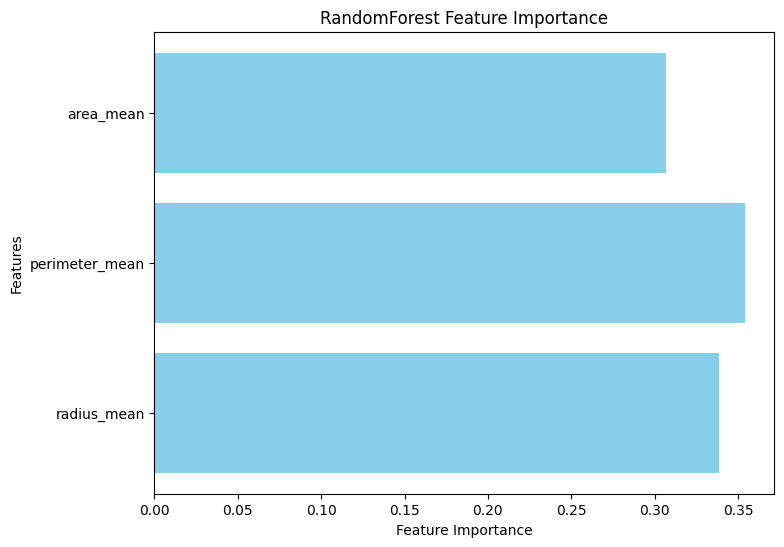

(0.9181286549707602,
 {'radius_mean': 0.3388839828438369,
  'perimeter_mean': 0.35410749972198025,
  'area_mean': 0.3070085174341827})

In [ ]:
#도전 1. 머신러닝 2



# 사용할 특성과 종속 변수 선택
X = df[['radius_mean', 'perimeter_mean', 'area_mean']]  # 독립 변수 (크기/형태 관련 특성)
y = df['diagnosis']  # 종속 변수 (악성/양성 여부)

# Label Encoding (이미 0/1로 인코딩되어 있지만, 일반적으로 적용 가능)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/Test 데이터 분할 (비율: 70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# RandomForest 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 모델의 정확도 계산
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Feature Importance 계산
feature_importance = rf_model.feature_importances_

# Feature Importance 시각화
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Feature Importance')
plt.show()

# 결과 출력 (정확도 및 각 특성의 중요도)
accuracy, dict(zip(X.columns, feature_importance))


**도전 1 답안 템플릿**
1. **모델 정확도: __% `코드 출력`**
2. **Feature Importance : 막대 그래프로 시각화 `코드 출력`**
3. **Feature Importance : 해석 `마크다운으로 작성`**

도전 1 답안 템플릿

모델 정확도: 0.92%


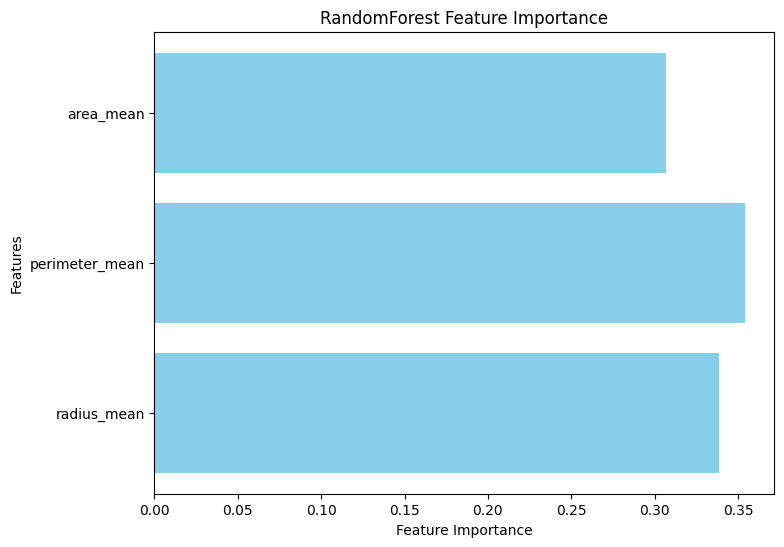

In [ ]:
# 결과 출력
print(f"도전 1 답안 템플릿\n")
print(f"모델 정확도: {accuracy:.2f}%")

# Feature Importance 시각화
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Feature Importance')
plt.show()

3.Feature Importance : 해석
#결론
종양의 크기(특히 둘레)가 악성 여부를 예측하는 데 가장 중요한 요소이며, 반지름과 면적도 유의미한 영향을 미침

**도전 1 답안**

**도전 2. 머신러닝 3**


---
- **과제**
    
    **형태 복잡도 특성(compactness_mean, concavity_mean, concave points_mean)을 사용하여 종양의 악성 여부를 예측하는 로지스틱 회귀 모델을 학습시켜주세요.**
    
    학습된 모델을 사용하여 다음 작업을 수행해주세요.
    
    1. 모델의 정확도를 계산해주세요.
    2. 각 특성의 계수를 막대 그래프로 시각화해주세요.
    3. 아래의 조건에 맞춰, 새로운 종양의 악성 확률을 계산해주세요.
        - compactness_mean : `0.1`
        - concavity_mean : `0.1`
        - concave points_mean : `0.05`
- **학습 및 추론 방법**
    - y(종속변수)는 B/M으로 기재된 이진형 데이터이므로, 인코딩 작업이 필요합니다.
        
        구현을 위해 **LabelEncoder**를 사용해주세요.
        
    - 머신러닝 코드 작성 시, 전체 데이터셋을 Train set과 Test set으로 나눠주세요.
        - **Test set 비중 : 30%**
        - **random_state : 42**
    - **계수** 시각화 코드 작성 시, 각 특성의 계수 크기를 비교할 수 있도록 **막대 그래프**를 생성하세요.
        - 양수/음수를 다른 색상으로 표시해주세요.
    - 새로운 종양 데이터를 **`new_tumor`** 변수에 지정하고, **`model.predict_proba`**를 사용하여 악성 확률을 구해주세요.


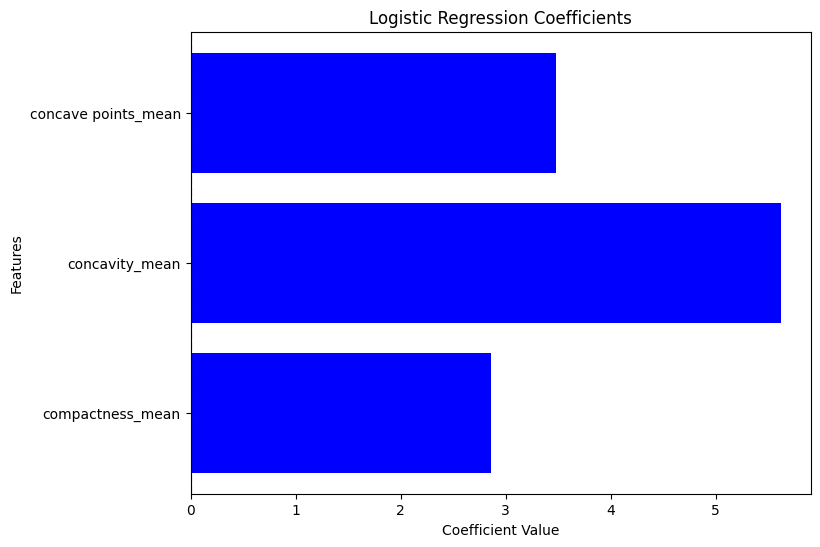

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(0.8245614035087719,
 {'compactness_mean': 2.8590316378113814,
  'concavity_mean': 5.62159751547075,
  'concave points_mean': 3.478342544288377},
 0.381925632343979)

In [ ]:
# 도전 2. 머신러닝 3

# 사용할 특성과 종속 변수 선택
X = df[['compactness_mean', 'concavity_mean', 'concave points_mean']]  # 독립 변수 (형태 복잡도 관련 특성)
y = df['diagnosis']  # 종속 변수 (악성/양성 여부)

# Label Encoding (이미 0/1로 인코딩되어 있지만, 일반적으로 적용 가능)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/Test 데이터 분할 (비율: 70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# 모델의 정확도 계산
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 로지스틱 회귀 계수 가져오기
coefficients = logistic_model.coef_[0]

# 계수 시각화 (양수/음수 색상 구분)
plt.figure(figsize=(8, 6))
colors = ['red' if coef < 0 else 'blue' for coef in coefficients]
plt.barh(X.columns, coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='--')  # 0 기준선 추가
plt.show()

# 새로운 종양 데이터 생성 및 악성 확률 예측
new_tumor = np.array([[0.1, 0.1, 0.05]])  # compactness_mean, concavity_mean, concave points_mean
malignancy_probability = logistic_model.predict_proba(new_tumor)[0][1]  # 악성 확률

# 결과 출력 (정확도, 각 특성의 계수, 새로운 종양의 악성 확률)
accuracy, dict(zip(X.columns, coefficients)), malignancy_probability


**도전 3 답안 템플릿**
1. **모델 정확도: __% `코드 출력`**
2. **로지스틱 회귀 계수: 막대 그래프로 시각화 `코드 출력`**
3. **새로운 종양의 예측 확률**: 양성 __%, 음성 __%  **`코드 출력`**


모델 정확도: 0.82%


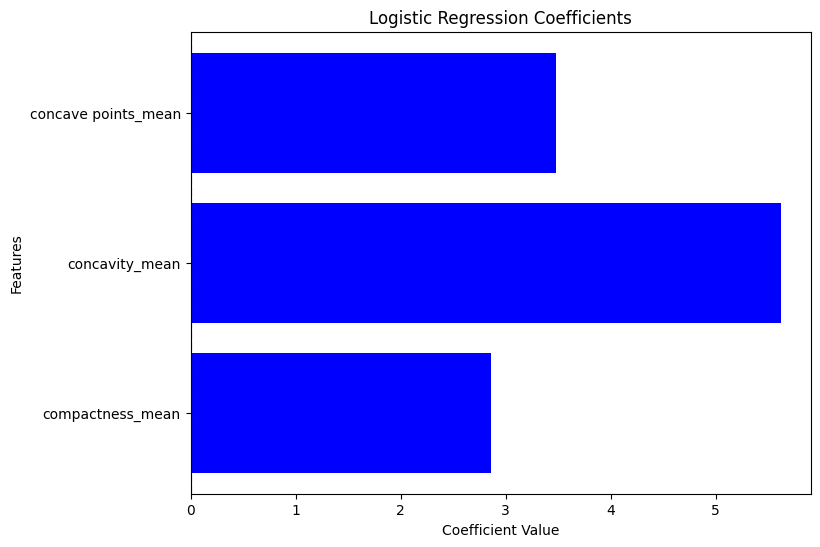

새로운 종양의 예측 확률: 양성 0.38%, 음성 99.62%


In [ ]:
# 결과 출력 (포맷에 맞게)
print(f"모델 정확도: {accuracy:.2f}%")

plt.figure(figsize=(8, 6))
colors = ['red' if coef < 0 else 'blue' for coef in coefficients]
plt.barh(X.columns, coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='--')  # 0 기준선 추가
plt.show()

print(f"새로운 종양의 예측 확률: 양성 {malignancy_probability:.2f}%, 음성 {100 - malignancy_probability:.2f}%")
